# Lab 1 - Exploratory Data Analysis

## What is EDA?

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Data Exploration

Data Exploration is an integral part of EDA (Exploratory Data Analysis). Whatever you decide to do in the later phases (creating/selecting a machine learning model or summarizing your findings), will depend on the assumptions you make in the exploration phase. It’s not a single step phase, but we get to determine a lot about our data during data exploration e.g. checking data distribution, finding correlation, finding outliers and missing values, etc

### Data Visualization

Data Visualizations aren’t part of any specific phase in a data analytics project. We can use visuals to represent the data at any point in our project. We need visualization as a visual summary of the data, because it’s easier to understand for identifying relations and patterns. Many visuals are used in the data exploration phase to find outliers, correlation between features, etc. 

Some examples of the basic and widely used charts: 

*   Line chart
*   Bar chart
-  Histogram
-  Box plot
-  Scatter plot
-  Heatmap

## Libraries

### Pandas

One of the most popular libraries in Python for data analysis and manipulation.

There are two main data structures in Pandas:


*   Series: a one-dimensional array of values with an index.

*   DataFrame: a two-dimensional array of values with both a row and a column index.




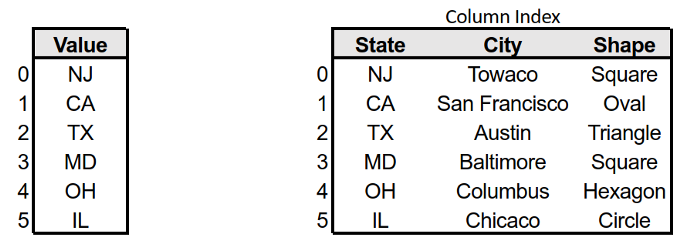

A Series, on the left, and a DataFrame on the right. Image taken from General Assembly’s “Intro to Pandas” lesson.


Where a *DataFrame* is the entire dataset, including all rows and columns — a *Series* is essentially a single column within that DataFrame. 

### Matplotlib

Matplotlib was introduced to imitate all the graphics supported by MATLAB, but in a simpler form. Throughout the years, multiple functionalities have been added to the library. Not just this, but many visualizations libraries and tools are built on top of Matplotlib with new, interactive, and attractive visuals

### Seaborn

Matplotlib is a base for many tools, and Seaborn is one of them. In Seaborn, you can create attractive charts with minimal effort. It has high-level functions for common statistical plots to make them informative and attractive.

Let's import our libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## EDA

In [4]:
df_titanic = pd.read_csv("D:/01-Desktop Folders/02-Teaching (GUC)/GUC/01_GUC-Teaching/2023/W23_Data_Engineering_CSEN1095/01-Tutorials/Lab 1/titanic.csv",index_col=0)

In [3]:
df_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


To check the shape of the dataframe:

In [4]:
df_titanic.shape

(891, 11)

Let's take a quick look at some basic information like the number of Non-null values in columns and their datatype 

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


With one line of code, we can a have a look at some statistics of the data.

In [6]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


By default, describe shows the statistics of numerical columns. If we want to include other columns we can use the line below.

In [8]:
df_titanic.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


If we want to check the frequency in each value in the column we can use `value_counts()`

In [9]:
df_titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In order to see how many unique values exist for each variable, we can use `nunique()`

In [10]:
df_titanic.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

We can take a look at how many null values we have in our dataset.

In [11]:
df_titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We can see that age and cabin have a lot of null values. We will learn to handle the missing values later. 

## Univariate Analysis

After taking a look at your data, the next step is to analyze the variables in our data so we can understand the data better. We'll start by analyzing individual variables

### Continuous Variables

For continuous variables, we need to understand the central tendency and spread of the variable. Univariate analysis is also used to highlight missing and outlier values.  

C:\Users\Dalia\AppData\Local\Temp\ipykernel_660\2514882296.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic["Age"])


<Axes: xlabel='Age', ylabel='Density'>

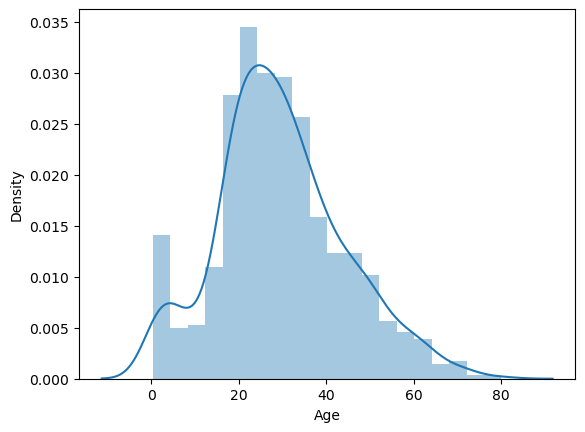

In [12]:
sns.distplot(df_titanic["Age"])

C:\Users\Dalia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Dalia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Dalia\anaconda3\Lib\s

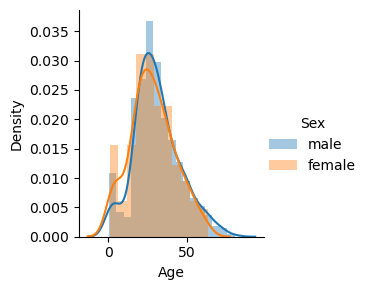

In [13]:
sns.FacetGrid(df_titanic, hue="Sex").map(sns.distplot, "Age").add_legend()

We can use box plots to identify the skewness of the distribution and identify outliers. Box plot gives us a five-number summary of any variable: the minimum, maximum, the sample median, the first and third quartile. Let's see the boxplot of the ages of the people on the Titanic.

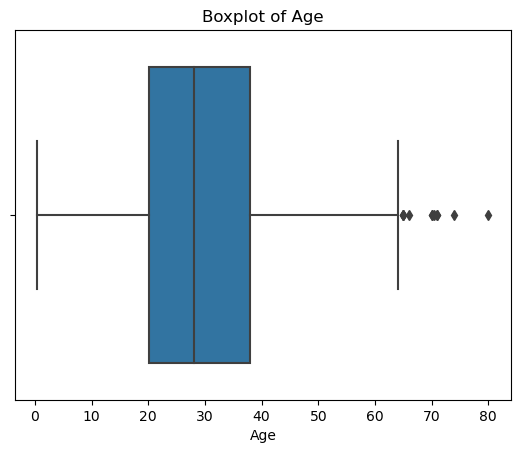

In [14]:
sns.boxplot(x='Age', data=df_titanic)
plt.title('Boxplot of Age')
plt.show()

### Categorical Variables

For categorical variables, we can check out the frequency of each category under each value. For example, let's see how many people were in each Pclass on the Titanic.

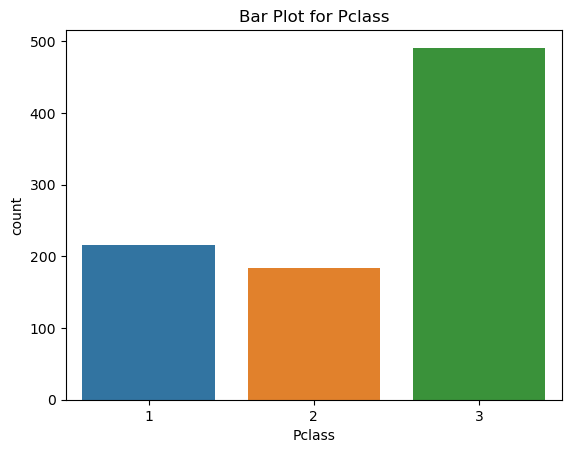

In [6]:
sns.countplot(data = df_titanic,x='Pclass')
plt.title('Bar Plot for Pclass')
plt.show()

We can also start answering some questions like in each class how many people survived? First we will need to find the survival rate for each pclass. This can be done using Pandas method `groupby()` 

In [27]:
df_survivedTitanic = (df_titanic[(df_titanic['Age'].notnull()) & (df_titanic['Survived']==1)])
class_series = df_survivedTitanic.groupby(['Pclass'])['Survived'].sum()
class_series

Pclass
1    122
2     83
3     85
Name: Survived, dtype: int64

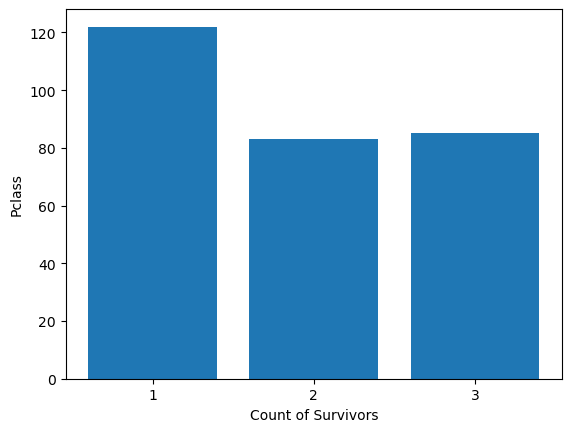

In [28]:
fig, axs = plt.subplots(1,1,dpi=100)
axs.set_ylabel('Pclass')
axs.set_xlabel('Count of Survivors')
bar_chart = plt.bar(class_series.index, class_series)#switch x and y when you create barh
plt.locator_params(integer=True)

If we want to show more than one observation on the same bar plot, like for example the number of people in each Pclass and also how many of them survived, we can do so using stacked bar plot. 

In [ ]:
survivors_class = df_titanic[df_titanic.Survived==1].groupby(['Pclass']).size().values
non_survivors_class = df_titanic[df_titanic.Survived==0].groupby(['Pclass']).size().values
class_categories = ['Upper Class', 'Middle Class', 'Lower Class']

<BarContainer object of 3 artists>

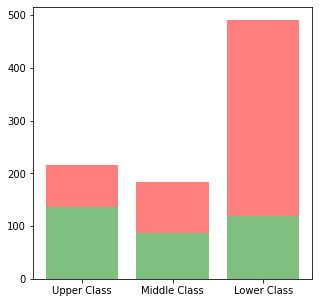

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(5,5))
plt.xticks([0,1,2], class_categories )
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')


## Bivariate Analysis

Bivariate analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables. We can use scatterplots or heatmaps to do that. 

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can use a scatterplot to see if there is a relationship between the tip and the total_bill

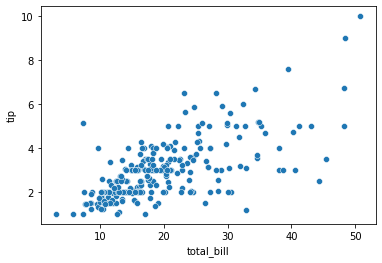

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.show()

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

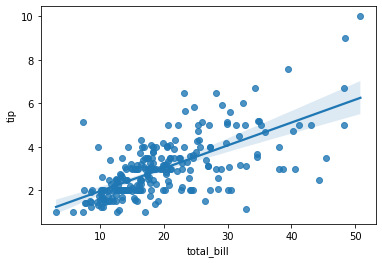

In [ ]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.show()

We can see that there is indeed a strong positive relationship between them. We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how gender affects the relationship between total_bill and tip, we can color-code the points by 'sex', and plot the other two columns on the axes.



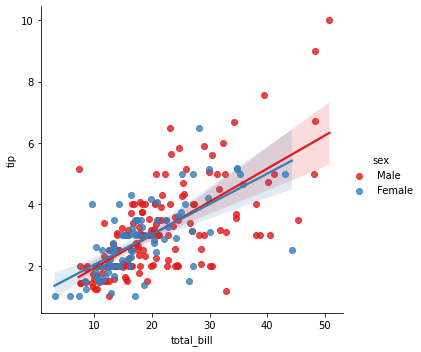

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=tips,hue='sex',palette='Set1')
plt.show()

## Multivariate Analysis

Multivariate analysis finds out the relationship between more than two variables. For that we can use a pair plot which shows a clear and nice view of all variables and their relation ship with all other variables.


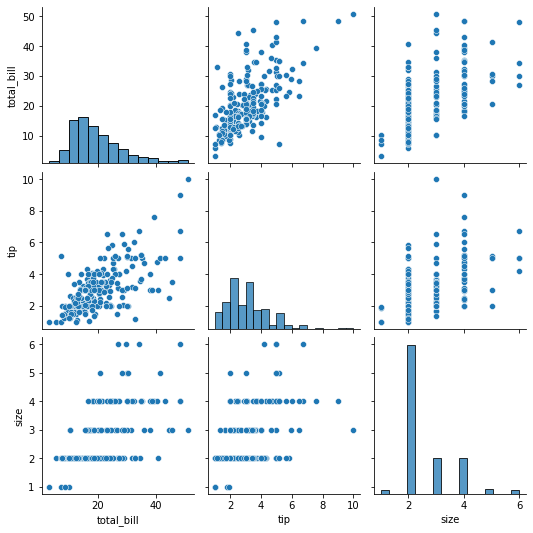

In [ ]:
sns.pairplot(tips)

## Example

### EDA on Netflix

First, let's import the dataset.

In [ ]:
df_netflix =pd.read_csv("https://raw.githubusercontent.com/raneemsultan/Data-Engineering-W21/main/Lab1/netflix-titles.csv")

In [ ]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Let's examine the shape and data types

In [ ]:
df_netflix.shape

(8807, 12)

In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df_netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

Let's see how the content is distributed

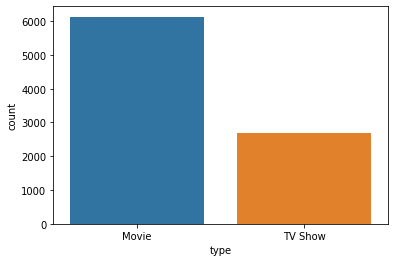

In [ ]:
ax = sns.countplot(x="type", data=df_netflix)

Which countries have the highest number of movies and tv shows?

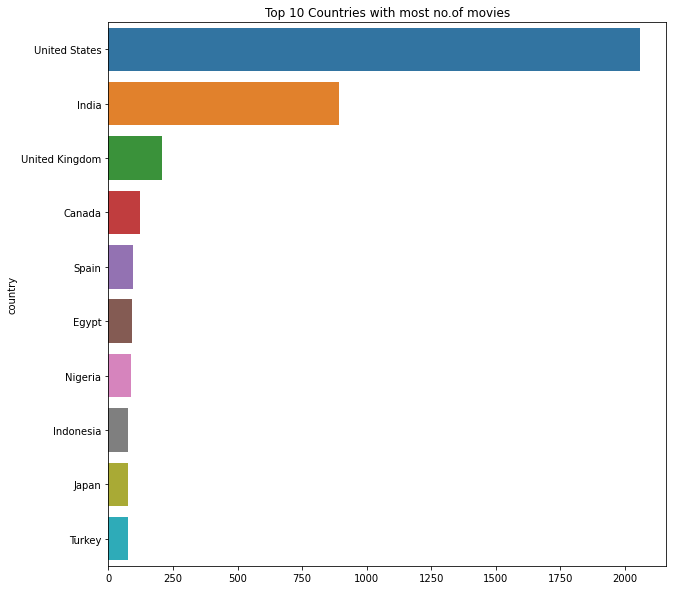

In [ ]:
query1 = df_netflix.title.groupby([df_netflix.type,df_netflix.country]).count()
sub_query1 = query1[('Movie',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 Countries with most no.of movies')
sns.barplot(y = sub_query1.index,x = sub_query1.values)

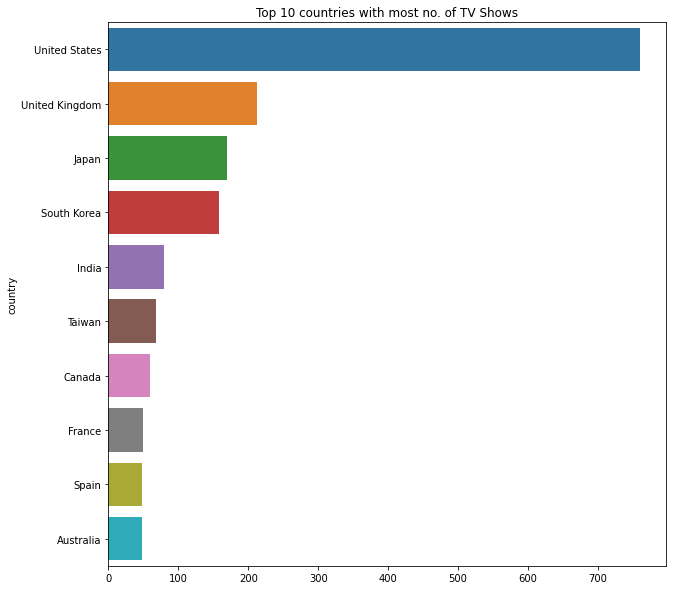

In [ ]:
sub_query3 = query1[('TV Show',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with most no. of TV Shows')
sns.barplot(y = sub_query3.index,x = sub_query3.values)

When was the most content released in the last 10 years?

In [ ]:
query4 = df_netflix.title.groupby([df_netflix.type,df_netflix.release_year]).count()

In [ ]:
content_released = df_netflix.type.groupby(df_netflix["release_year"]).count()

Text(0.5, 1.0, 'Movies over the last 10 years')

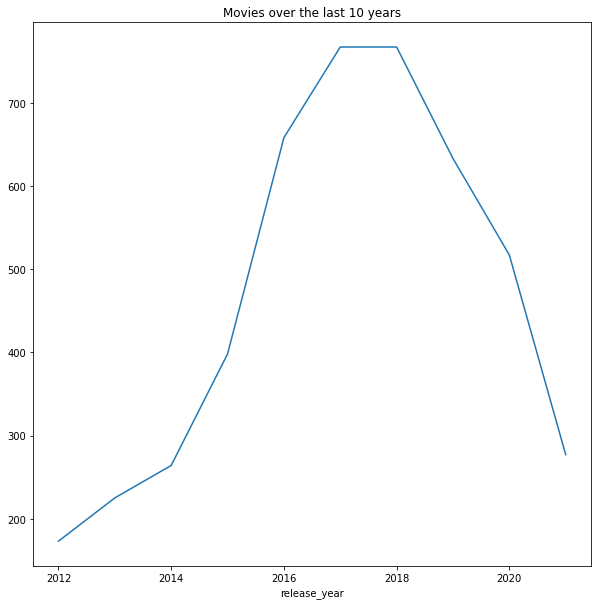

In [ ]:
sub_query6 = query4[('Movie',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
sns.lineplot(x = sub_query6.index,y = sub_query6.values)
plt.title('Movies over the last 10 years')

Text(0.5, 1.0, 'Shows over the last 10 years')

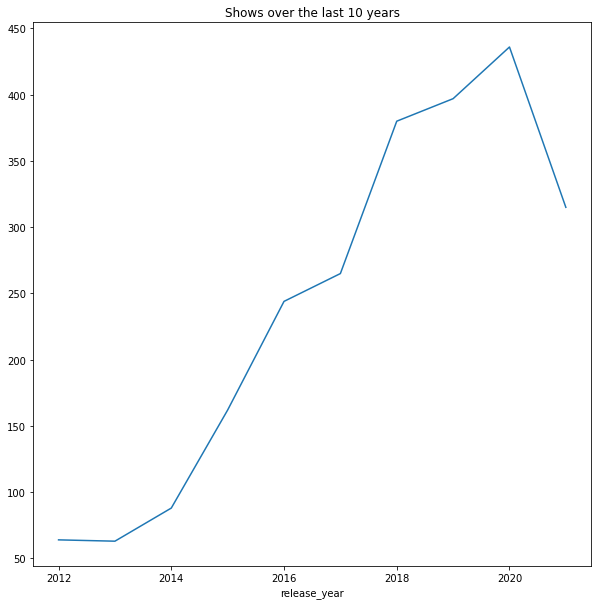

In [ ]:
sub_query6 = query4[('TV Show',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
sns.lineplot(x = sub_query6.index,y = sub_query6.values)
plt.title('Shows over the last 10 years')

## Task

### World Happiness Dataset

Perform EDA on the World Happiness Dataset. Try to come up with a few questions that you can answer throughout your analysis. 

In [ ]:
happiness_df = pd.read_csv("https://raw.githubusercontent.com/raneemsultan/Data-Engineering-W21/main/Lab1/happiness2019")